In [ ]:
# Dependencies
import random
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import locale
from locale import atof
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [ ]:

#jan_2018_df = pd.read_csv("../Resources/Jan_2018.csv")

jan_2018_df = pd.read_csv("../Resources/Master_Stats.csv")
"""
jan_2017_df = pd.read_csv("../Resources/Jan_2017.csv")
jan_2016_df = pd.read_csv("../Resources/Jan_2016.csv")
apr_2018_df = pd.read_csv("../Resources/Apr_2018.csv")
apr_2017_df = pd.read_csv("../Resources/Apr_2017.csv")
apr_2016_df = pd.read_csv("../Resources/Apr_2016.csv")
jul_2017_df = pd.read_csv("../Resources/July_2017.csv")
jul_2016_df = pd.read_csv("../Resources/July_2016.csv")
jul_2015_df = pd.read_csv("../Resources/July_2015.csv")
oct_2017_df = pd.read_csv("../Resources/Oct_2017.csv")
oct_2016_df = pd.read_csv("../Resources/Oct_2016.csv")
oct_2015_df = pd.read_csv("../Resources/Oct_2015.csv")
"""
master_stats_df = jan_2018_df
"""
master_stats_df = master_stats_df.append(jan_2017_df)
master_stats_df = master_stats_df.append(jan_2016_df)
master_stats_df = master_stats_df.append(apr_2018_df)
master_stats_df = master_stats_df.append(apr_2017_df)
master_stats_df = master_stats_df.append(apr_2016_df)
master_stats_df = master_stats_df.append(jul_2017_df)
master_stats_df = master_stats_df.append(jul_2016_df)
master_stats_df = master_stats_df.append(jul_2015_df)
master_stats_df = master_stats_df.append(oct_2017_df)
master_stats_df = master_stats_df.append(oct_2016_df)
master_stats_df = master_stats_df.append(oct_2015_df)
"""
#master_stats_df = pd.read_csv("../Resources/Jan_2018.csv")
master_stats_df.fillna(value=0 , inplace=True)



unique_carrier_list = master_stats_df["UniqueCarrier"].unique()

Delay_df = master_stats_df[master_stats_df.DepDelayMinutes > 0]
beforetime_df = master_stats_df[master_stats_df.ArrDelay < 0]
cancelled_flights_df = master_stats_df[master_stats_df.Cancelled > 0]
diverted_flights_df = master_stats_df[master_stats_df.Diverted > 0]

#master_stats_df.head()

In [3]:
#master_stats_df.to_csv("../Resources/Master_Stats.csv")

In [4]:
#master_stats_df.dtypes

In [ ]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_total_flights_df = carrier_group_df["Flights"].sum()
count_chart = carrier_total_flights_df.plot(kind='bar', figsize= (10,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Carrier Codes")
count_chart.set_ylabel("Total Flights")

plt.title("Total Flights VS Carrier Codes")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()


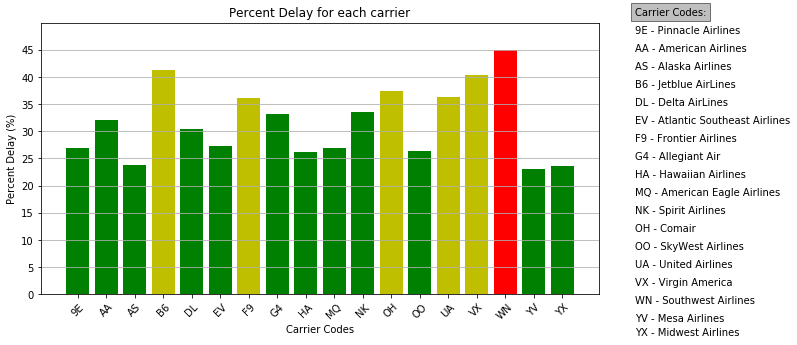

In [6]:
carrier_group_df = master_stats_df.groupby("UniqueCarrier")

carrier_delay_group_df = Delay_df.groupby("UniqueCarrier")


carrier_delay_per  = []

carrier_delay_per = [carrier_delay_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

colors = ['r' if value >= 42 else 'y' if value >= 35 else 'g'  for value in carrier_delay_per]
plt.figure(figsize=(10,5))
plt.bar(unique_carrier_list,carrier_delay_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)
plt.ylim(0,50)
plt.yticks(np.arange(0,50,5))

plt.title("Percent Delay for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")

plt.show()
plt.tight_layout()
plt.show()

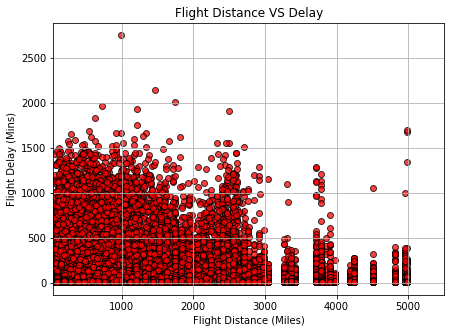

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(Delay_df["Distance"], Delay_df["DepDelayMinutes"],marker="o", facecolors="red", edgecolors="black",alpha=0.75)
plt.title("Flight Distance VS Delay")
plt.xlabel("Flight Distance (Miles)")
plt.ylabel("Flight Delay (Mins)")
plt.xlim(50,5500)
plt.grid()
plt.show()

In [8]:
# weekdays_delay_df = Delay_df.groupby("DayOfWeek")
# weekdays_total_df = master_stats_df.groupby("DayOfWeek")

# weekday_delay_per  = []
# weekday_list = master_stats_df["DayOfWeek"].unique()
# tick_labels = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]

# weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]

# colors = ['r' if value >= 35 else 'b'  for value in weekday_delay_per]

# plt.bar(weekday_list,weekday_delay_per, color=colors)
# plt.xlabel("Days of week")
# plt.ylabel("Percent Delay (%)")
# plt.title("Percent Delay for days of a week")
# plt.grid(axis='y')
# plt.xticks(weekday_list, tick_labels)
# plt.ylim(0,50)
# plt.show()
# plt.tight_layout()
# plt.show()

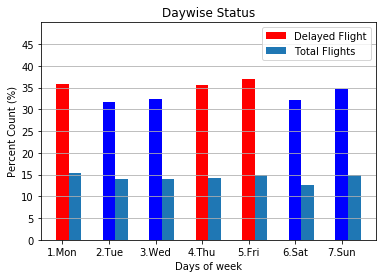

In [9]:
weekdays_delay_df = Delay_df.groupby("DayOfWeek")
weekdays_total_df = master_stats_df.groupby("DayOfWeek")

weekday_delay_per  = []
weekday_list = master_stats_df["DayOfWeek"].unique()

weekday_list.sort()
tick_labels = ["1.Mon","2.Tue","3.Wed","4.Thu","5.Fri","6.Sat","7.Sun"]

weekday_delay_per = [weekdays_delay_df.get_group(day).size/weekdays_total_df.get_group(day).size* 100 for day in weekday_list]
weekday_flights_per = [weekdays_total_df.get_group(day).size/master_stats_df.size * 100 for day in weekday_list]

colors = ['r' if value >= 35 else 'b'  for value in weekday_delay_per]

width = 0.27
fig1 = plt.bar(weekday_list, weekday_delay_per , width, color=colors)
fig2 = plt.bar(weekday_list+0.27, weekday_flights_per, width)
plt.xlabel("Days of week")
plt.ylabel("Percent Count (%)")
plt.title("Daywise Status")
plt.grid(axis='y')
plt.xticks(weekday_list, tick_labels)
plt.yticks(np.arange(0, 50, 5))

plt.ylim(0,50)
plt.legend( (fig1[0], fig2[0]), ('Delayed Flight', 'Total Flights') )
plt.show()
plt.tight_layout()
plt.show()

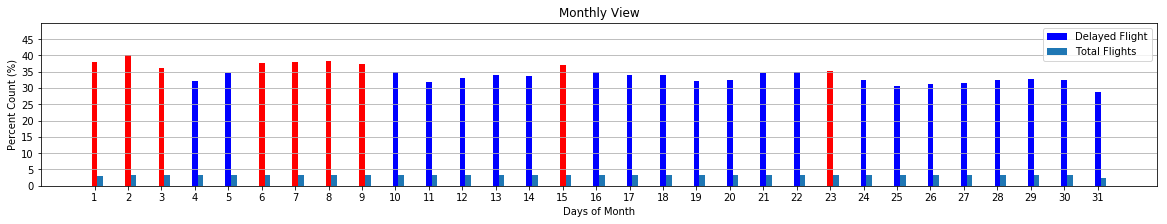

In [10]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]
daily_flights_per = [daily_total_df.get_group(day).size/master_stats_df.size * 100 for day in daily_list]

colors = ['r' if value >= 35 else 'b'  for value in daily_delay_per]
plt.figure(figsize=(20,3))

width = 0.17
fig1 = plt.bar(daily_list,daily_delay_per, width,color = colors)
fig2 = plt.bar(daily_list+width,daily_flights_per,width)
plt.xlabel("Days of Month")
plt.ylabel("Percent Count (%)")
plt.title("Monthly View")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.yticks(np.arange(0, 50, 5))
plt.legend( (fig1[0], fig2[0]), ('Delayed Flight', 'Total Flights') )
plt.show()
plt.tight_layout()



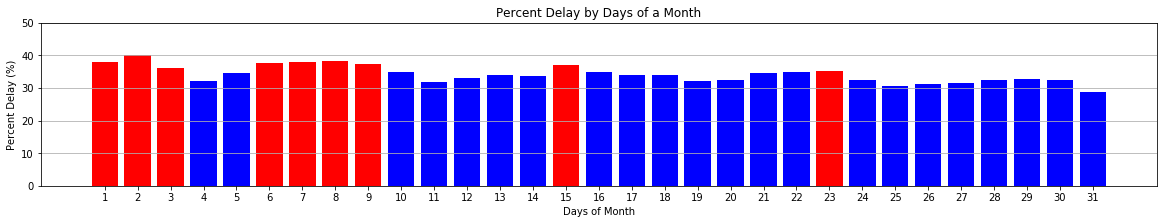

In [11]:
daily_delay_df = Delay_df.groupby("DayofMonth")
daily_total_df = master_stats_df.groupby("DayofMonth")

daily_delay_per  = []
daily_list = master_stats_df["DayofMonth"].unique()

daily_delay_per = [daily_delay_df.get_group(day).size/daily_total_df.get_group(day).size* 100 for day in daily_list]


colors = ['r' if value >= 35 else 'b'  for value in daily_delay_per]
plt.figure(figsize=(20,3))
plt.bar(daily_list,daily_delay_per, color = colors)
plt.xlabel("Days of Month")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Days of a Month")
plt.grid(axis='y')
plt.ylim(0,50)
plt.xticks(daily_list)
plt.show()
plt.tight_layout()
plt.figure(figsize=(20,30))


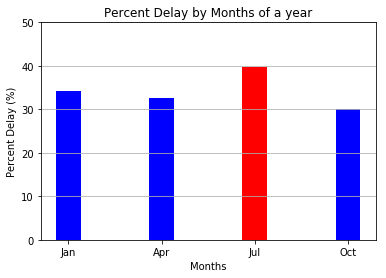

In [12]:
monthly_delay_df = Delay_df.groupby("Month")
monthly_total_df = master_stats_df.groupby("Month")

monthly_delay_per  = []
monthly_list = master_stats_df["Month"].unique()

monthly_delay_per = [monthly_delay_df.get_group(month).size/monthly_total_df.get_group(month).size* 100 for month in monthly_list]

colors = ['r' if value >= 35 else 'b'  for value in monthly_delay_per]
plt.bar(monthly_list,monthly_delay_per, color = colors)
plt.xlabel("Months")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by Months of a year")
plt.grid(axis='y')
tick_labels = ["Jan","Apr","Jul","Oct"]
plt.ylim(0,50)
plt.xticks(monthly_list, tick_labels)
plt.show()
plt.tight_layout()



In [13]:
# yearly_delay_df = Delay_df.groupby("Year")
# yearly_total_df = master_stats_df.groupby("Year")

# yearly_delay_per  = []
# yearly_list = master_stats_df["Year"].unique()

# yearly_delay_per = [yearly_delay_df.get_group(year).size/yearly_total_df.get_group(year).size* 100 for year in yearly_list]


# plt.bar(yearly_list,yearly_delay_per)
# plt.xlabel("Years")
# plt.ylabel("Percent Delay (%)")
# plt.title("Percent Delay by Years")
# plt.grid(axis='y')
# plt.ylim(0,50)
# plt.xticks(yearly_list)

# plt.show()
# plt.tight_layout()


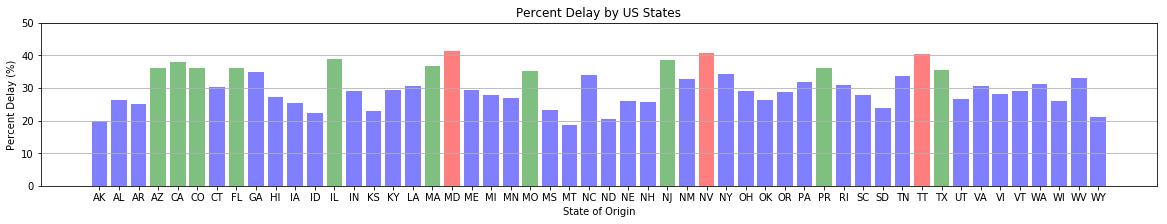

In [14]:
state_delay_df = Delay_df.groupby("OriginState")
state_total_df = master_stats_df.groupby("OriginState")

state_delay_per  = []
state_list = master_stats_df["OriginState"].unique()

state_delay_per = [state_delay_df.get_group(state).size/state_total_df.get_group(state).size* 100 for state in state_list]

colors = ['r' if value >= 40 else 'g' if value >= 35 else 'b'  for value in state_delay_per]

plt.figure(figsize=(20,3))
plt.bar(state_list,state_delay_per,color=colors, alpha=0.5, align="center")
plt.xlabel("State of Origin")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay by US States")
plt.grid(axis='y')
plt.ylim(0,50)
plt.show()
plt.tight_layout()



Text(0.5,1,'Delay Reasons')

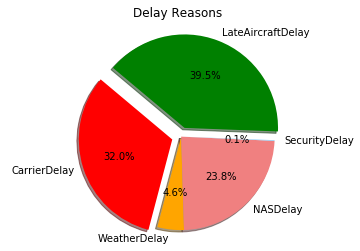

In [15]:
#http://aspmhelp.faa.gov/index.php/Types_of_Delay

labels = ["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]
delay_reasons_df = master_stats_df[["CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay"]]
count = delay_reasons_df.sum()

explode = (0.1, 0, 0, 0, 0.1)

colors = ["red", "orange", "lightcoral", "lightskyblue","green"]

plt.pie(count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("Delay Reasons")

In [16]:
# dep_timeblk_df = Delay_df.groupby("DepTimeBlk")["DepDelayMinutes"].sum()

# # Create a bar chart based off of the group series from before
# count_chart = dep_timeblk_df.plot(kind='bar', figsize= (15,5))

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Departure Time")
# count_chart.set_ylabel("Total Delay (Mins)")

# plt.title("Total Delay (Mins) VS Departure Time")
# plt.grid(axis='y')
# plt.show()
# plt.tight_layout()

/Users/ghassan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


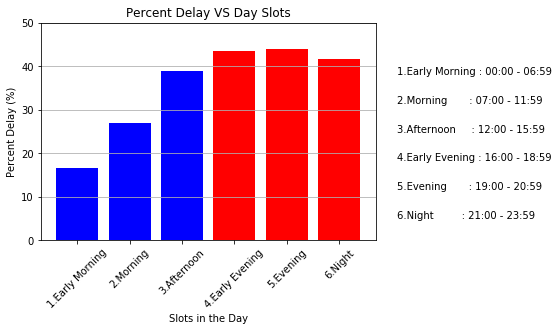

In [17]:
bins = [1, 659, 1159, 1559, 1859, 2059, 2359]

# Create the names for the bins
group_names = ["1.Early Morning","2.Morning","3.Afternoon","4.Early Evening","5.Evening","6.Night"]

time_slot_df = master_stats_df
time_slot_df["Day Slot"] = pd.cut(time_slot_df["CRSDepTime"], bins, labels=group_names)

time_slot_delay_df = Delay_df
time_slot_delay_df["Day Slot"] = pd.cut(time_slot_delay_df["CRSDepTime"], bins, labels=group_names)

time_slot_grouped_df = time_slot_df.groupby("Day Slot")
#time_slot_grouped_df.count()

time_slot_delay_grouped_df = time_slot_delay_df.groupby("Day Slot")
#time_slot_delay_grouped_df.count()

time_slot_per_delay = [time_slot_delay_grouped_df.get_group(slot).size/time_slot_grouped_df.get_group(slot).size * 100 for slot in group_names]


colors = ['r' if value >= 40 else 'b'  for value in time_slot_per_delay]
plt.bar(group_names,time_slot_per_delay, color=colors)
plt.xlabel("Slots in the Day")
plt.ylabel("Percent Delay (%)")
plt.xticks(rotation = 45)
plt.ylim (0,50)
#plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.70, "1.Early Morning : 00:00 - 06:59")
plt.figtext(0.95,0.60, "2.Morning       : 07:00 - 11:59")
plt.figtext(0.95,0.50, "3.Afternoon     : 12:00 - 15:59")
plt.figtext(0.95,0.40, "4.Early Evening : 16:00 - 18:59")
plt.figtext(0.95,0.30, "5.Evening       : 19:00 - 20:59")
plt.figtext(0.95,0.20, "6.Night         : 21:00 - 23:59")

plt.title("Percent Delay VS Day Slots")
plt.grid(axis='y')
plt.show()
plt.tight_layout()

plt.figtext(1.0,0.7, "Note:")
plt.figtext(1.0,0.65, "Circle size correlates with driver count per city.")

plt.show()

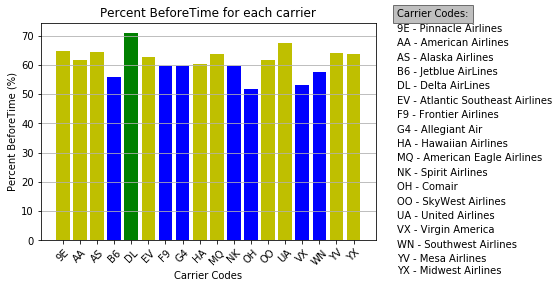

In [18]:
carrier_beforetime_group_df = beforetime_df.groupby("UniqueCarrier")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

carrier_bt_per  = []

carrier_bt_per = [carrier_beforetime_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

colors = ['g' if value >= 70 else 'y' if value >= 60 else "b"  for value in carrier_bt_per]

plt.bar(unique_carrier_list,carrier_bt_per, color = colors)
plt.xlabel("Carrier Codes")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime for each carrier")
plt.grid(axis='y')
plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()
plt.show()

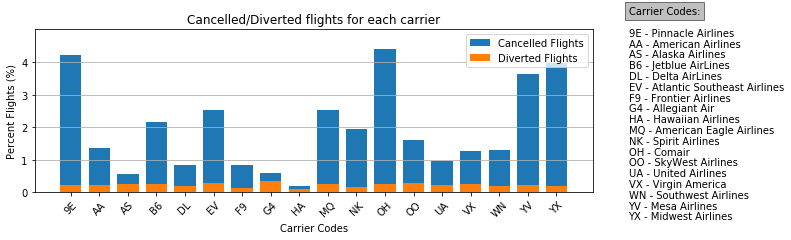

In [19]:
carrier_cancelled_group_df = cancelled_flights_df.groupby("UniqueCarrier")

carrier_cancelled_per = [carrier_cancelled_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

carrier_diverted_group_df = diverted_flights_df.groupby("UniqueCarrier")

carrier_diverted_per = [carrier_diverted_group_df.get_group(carrier).size/carrier_group_df.get_group(carrier).size* 100 for carrier in unique_carrier_list]

width = 0.75

plt.figure(figsize=(10,3))
fig1 = plt.bar(unique_carrier_list,carrier_cancelled_per, width)
fig2 = plt.bar(unique_carrier_list,carrier_diverted_per, width)

plt.xlabel("Carrier Codes")
plt.ylabel("Percent Flights (%)")
plt.xticks(rotation = 45)
plt.yticks(np.arange(0, 50, 5))
plt.title("Cancelled/Diverted flights for each carrier")
plt.grid(axis='y')
plt.legend( (fig1[0], fig2[0]), ('Cancelled Flights', 'Diverted Flights') )
plt.ylim(0,5)
plt.yticks(np.arange(0, 5, 1))
plt.figtext(0.95,0.95, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0, "YX - Midwest Airlines")
plt.show()
plt.tight_layout()



Text(0.1,-0.07,'Circle size correlates with Delay Duration for each Carrier')

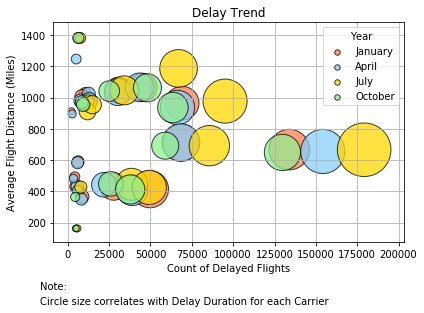

In [20]:

year_grouped_df = Delay_df.groupby(["Month"])
jan_grouped = year_grouped_df.get_group(1).groupby("UniqueCarrier")
apr_grouped = year_grouped_df.get_group(4).groupby("UniqueCarrier")
july_grouped = year_grouped_df.get_group(7).groupby("UniqueCarrier")
oct_grouped = year_grouped_df.get_group(10).groupby("UniqueCarrier")


jan_flight_Distance = jan_grouped["Distance"].median()
jan_delay_count = jan_grouped["Flights"].size()
jan_delay_minutes = jan_grouped["DepDelayMinutes"].sum()

apr_flight_Distance = apr_grouped["Distance"].median()
apr_delay_count = apr_grouped["Flights"].size()
apr_delay_minutes = apr_grouped["DepDelayMinutes"].sum()

july_flight_Distance = july_grouped["Distance"].median()
july_delay_count = july_grouped["Flights"].size()
july_delay_minutes = july_grouped["DepDelayMinutes"].sum()

oct_flight_Distance = oct_grouped["Distance"].median()
oct_delay_count = oct_grouped["Flights"].size()
oct_delay_minutes = oct_grouped["DepDelayMinutes"].sum()

plt.scatter(jan_delay_count, jan_flight_Distance, marker="o", s=jan_delay_minutes/2000, facecolors = 'coral' , edgecolors="black", alpha=0.75, label="January")
plt.scatter(apr_delay_count, apr_flight_Distance, marker="o", s=apr_delay_minutes/2000, facecolors = 'lightskyblue' , edgecolors="black", alpha=0.75, label="April")
plt.scatter(july_delay_count, july_flight_Distance, marker="o", s=july_delay_minutes/2000, facecolors= 'gold' , edgecolors="black", alpha=0.75, label="July")
plt.scatter(oct_delay_count, oct_flight_Distance, marker="o", s=oct_delay_minutes/2000, facecolors= 'lightgreen' , edgecolors="black", alpha=0.75, label="October")


plt.title("Delay Trend")
plt.xlabel("Count of Delayed Flights")
plt.ylabel("Average Flight Distance (Miles)")
plt.tight_layout()
plt.grid()

# Create a legend
legend = plt.legend(loc = "best",title = "Year")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]
legend.legendHandles[3]._sizes = [30]

# Incorporate a text label regarding circle size
plt.figtext(0.1,-0.02, "Note:")
plt.figtext(0.1,-0.07, "Circle size correlates with Delay Duration for each Carrier")

# # Save Figure
# # plt.savefig("../Images/PyberAnalysis.png")

['Stockton, CA', 'Dallas, TX', 'Hyannis, MA', "Martha's Vineyard, MA"]
[62.727272727272734, 50.618944717145844, 50.0, 61.864406779661017]


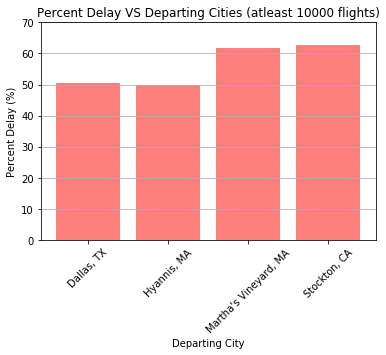

In [21]:
city_group_df = master_stats_df.groupby("OriginCityName")
city_delayed_group_df = Delay_df.groupby("OriginCityName")

city_delay_per  = []
city_list = master_stats_df["OriginCityName"].unique()
city_delay_per = [city_delayed_group_df.get_group(city).size/city_group_df.get_group(city).size* 100 if city_group_df.get_group(city).size > 10000 else 0 for city in city_list]
city_filter_list = []
city_delay_filter_per = []

for count in range(0,len(city_list)-1):
    if city_delay_per[count] >= 50:
        city_delay_filter_per.append(city_delay_per[count])
        city_filter_list.append(city_list[count])

print(city_filter_list)

print(city_delay_filter_per)
colors = ['r' if value >= 50 else 'b'  for value in city_delay_filter_per]


plt.bar(city_filter_list,city_delay_filter_per,color=colors, alpha=0.5, align="center")
plt.xlabel("Departing City")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay VS Departing Cities (atleast 10000 flights)")
plt.grid(axis='y')
plt.xticks(rotation = 45)
plt.ylim(0,70)
#plt.yticks(np.arange(0,70,5))
plt.show()
plt.tight_layout()



['Aguadilla, PR', 'Ponce, PR', 'Guam, TT']
[51.083238312428733, 55.488540410132693, 63.243243243243242]


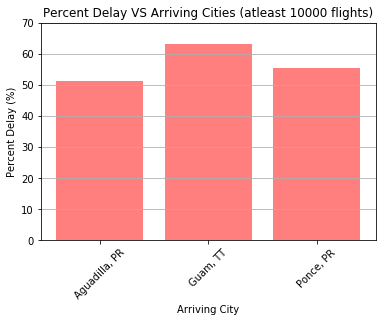

In [22]:
city_group_df = master_stats_df.groupby("DestCityName")
city_delayed_group_df = Delay_df.groupby("DestCityName")

city_delay_per  = []
city_list = master_stats_df["DestCityName"].unique()
city_delay_per = [city_delayed_group_df.get_group(city).size/city_group_df.get_group(city).size* 100 if city_group_df.get_group(city).size > 10000 else 0 for city in city_list]
city_filter_list = []
city_delay_filter_per = []

for count in range(0,len(city_list)-1):
    if city_delay_per[count] >= 50:
        city_delay_filter_per.append(city_delay_per[count])
        city_filter_list.append(city_list[count])

print(city_filter_list)

print(city_delay_filter_per)
colors = ['r' if value >= 50 else 'b'  for value in city_delay_filter_per]


plt.bar(city_filter_list,city_delay_filter_per,color=colors, alpha=0.5, align="center")
plt.xlabel("Arriving City")
plt.ylabel("Percent Delay (%)")
plt.title("Percent Delay VS Arriving Cities (atleast 10000 flights)")
plt.grid(axis='y')
plt.ylim(0,70)
plt.xticks(rotation = 45)
#plt.yticks(np.arange(0,70,5))
plt.show()
plt.tight_layout()


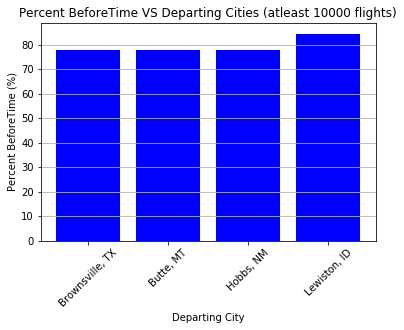

In [23]:
city_beforetime_group_df = beforetime_df.groupby("OriginCityName")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

city_bt_per  = []

city_bt_per = [city_beforetime_group_df.get_group(city).size/city_group_df.get_group(city).size* 100 if city_group_df.get_group(city).size > 10000 else 0 for city in city_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

colors = ['g' if value >= 70 else "b"  for value in city_bt_per]


city_filter_list = []
city_bt_filter_per = []

for count in range(0,len(city_list)-1):
    if city_bt_per[count] >= 77:
        city_bt_filter_per.append(city_bt_per[count])
        city_filter_list.append(city_list[count])

plt.bar(city_filter_list,city_bt_filter_per, color = colors)
plt.xlabel("Departing City")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime VS Departing Cities (atleast 10000 flights)")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

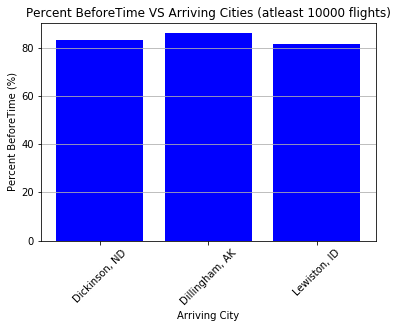

In [24]:
city_beforetime_group_df = beforetime_df.groupby("DestCityName")
#print(airline_group_df.count())
carrier_total_beforetime_df = carrier_beforetime_group_df["ArrDelay"].sum()

city_bt_per  = []

city_bt_per = [city_beforetime_group_df.get_group(city).size/city_group_df.get_group(city).size* 100 if city_group_df.get_group(city).size > 10000 else 0 for city in city_list]

# print(unique_carrier_list)
# print(carrier_delay_per)

colors = ['g' if value >= 70  else "b"  for value in carrier_bt_per]


city_filter_list = []
city_bt_filter_per = []

for count in range(0,len(city_list)-1):
    if city_bt_per[count] >= 80:
        city_bt_filter_per.append(city_bt_per[count])
        city_filter_list.append(city_list[count])

plt.bar(city_filter_list,city_bt_filter_per, color = colors)
plt.xlabel("Arriving City")
plt.ylabel("Percent BeforeTime (%)")
plt.xticks(rotation = 45)

plt.title("Percent BeforeTime VS Arriving Cities (atleast 10000 flights)")
plt.grid(axis='y')
plt.show()
plt.tight_layout()
plt.show()

In [25]:
# #master_stats_df.dtypes

# time_data_df = master_stats_df[["Month","Year","DepDelayMinutes"]]
# time_data_df = time_data_df.replace(to_replace= "1",value= "Jan")

# time_data_df.head()

# time_grouped_df = time_data_df.groupby(["Month","Year"])

# time_delay = time_grouped_df.sum()

# # Create a bar chart based off of the group series from before
# count_chart = time_delay.plot(kind='bar')

# # Set the xlabel and ylabel using class methods
# count_chart.set_xlabel("Months")
# count_chart.set_ylabel("Delay Minutes")


# plt.show()
# plt.tight_layout()

# # master_stats_df["MonthYear"]
# # # Plot the world average as a line chart
# # world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# # # Plot the unemployment values for a single country
# # country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
# #                         color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# # # Create a legend for our chart
# # plt.legend(handles=[world_avg, country_one], loc="best")

# # Show the chart
# # plt.show()

In [31]:
#master_stats_df["Distance"].mean()
#master_stats_df["AirTime"].mean()
airport_col = ['ID', 'Name', 'City', 'Country','Origin', 'ICAO', 'Lat', 'Long', 'Alt','Timezone', 'DST', 'Tz database time zone', 'type', 'source']
airport_df = pd.read_csv("./airy.csv",
names = airport_col, index_col = 0)
#print(airport_df.head())
df2=pd.read_csv('airport.csv')

In [32]:
df_lsq = pd.read_csv('../Resources/Master_Stats.csv', usecols=['Distance','AirTime'])
print(len(df_lsq))

5962813


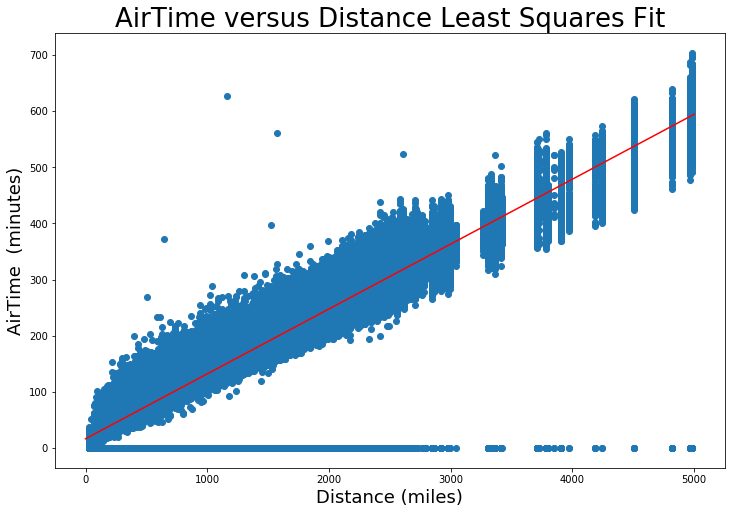

In [33]:
from numpy import arange,array,ones
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import math
#from matplotlib import pylab


x=df_lsq["Distance"]
y=df_lsq["AirTime"]

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)


xfit = np.linspace(0, 5000, 5000)
yfit = model.predict(xfit[:, np.newaxis])

fig, ax = plt.subplots(figsize=(12, 8))
ax.set_ylabel('AirTime  (minutes)',fontsize=18)
ax.set_xlabel('Distance (miles)',fontsize=18)
ax.set_title('AirTime versus Distance Least Squares Fit',fontsize=26)
plt.scatter(x, y)
plt.plot(xfit, yfit,c='r');

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_[1])


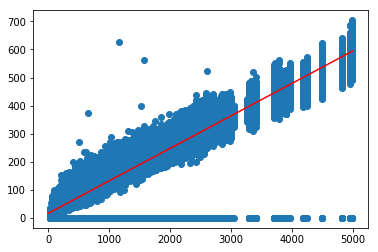

In [38]:
from numpy import arange,array,ones
from scipy import stats
from sklearn.linear_model import LinearRegression
#from matplotlib import pylab
day_df=master_stats_df[["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]][:2000]

x=master_stats_df["Distance"]
y=master_stats_df["AirTime"]

model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

xfit = np.linspace(0, 5000, 5000)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit,c='r');

In [39]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)


Model slope:     0.115589893807
Model intercept: 16.4776087314


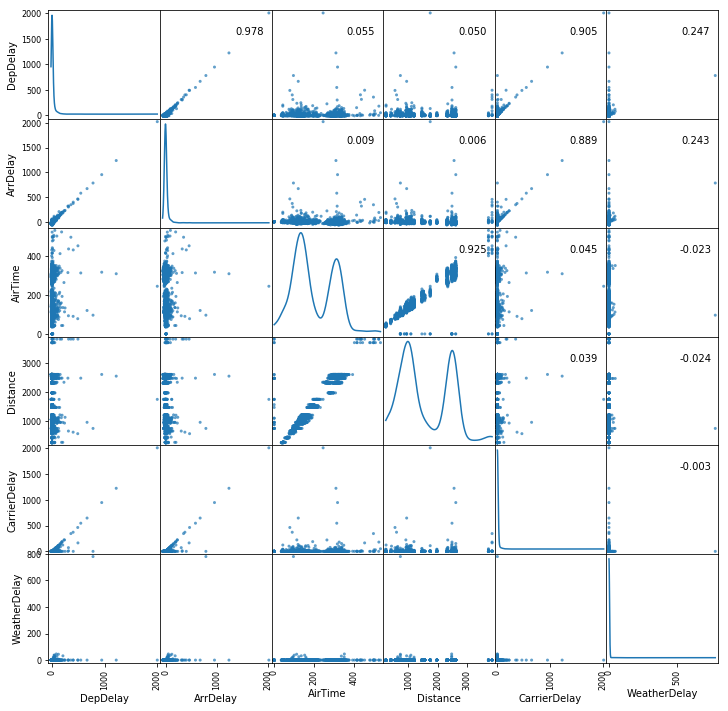

In [40]:
def plot_scatter_matrix(df_in):
    """"Plots a scatter matrix using pandas
    params:
    df_in = pandas frame to plot
    """
    fig = plt.figure()
    
    axes = scatter_matrix(df_in, alpha=0.7, figsize=(12, 12), diagonal='kde')

    corr = df_in.corr().as_matrix()
    for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
        axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
    #plt.title("Distribution of data for 2000 value", fontsize=22, va= 'top', ha="center")    
    #sns.heatmap(df_in, annot=True)
    #save 
    #plt.savefig('Flights_Fig1.png', dpi=300, bbox_inches="tight")
    #plt.imshow(corr, cmap='cool', vmin=0, vmax=1)  
    plt.show()
#    fig,ax=subplot()
#plt.gca().invert_yaxis()   
plot_scatter_matrix(day_df)
plt.show()

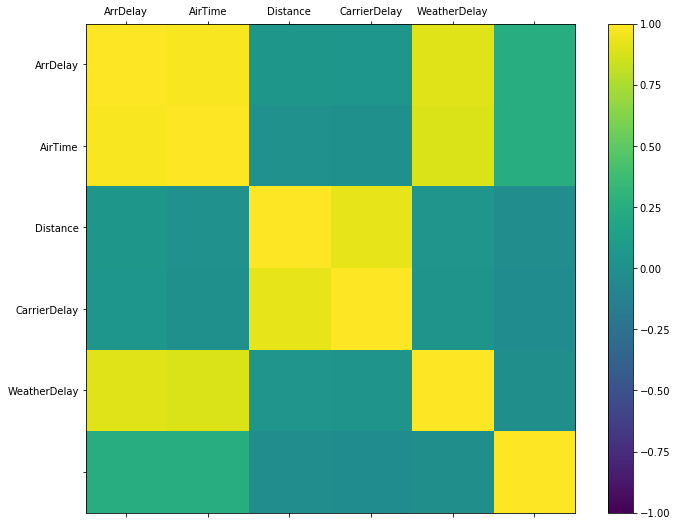

In [41]:
day_df=master_stats_df[["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]][:2000]

#day_df.to_csv('a2000.csv')
names=["DepDelay","ArrDelay","AirTime","Distance","CarrierDelay","WeatherDelay"]
#data = pd.read_csv('a2000.csv', names=names,skiprows=0)
correlations = day_df.corr()
# plot correlation matrix
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
#ticks = numpy.arange(0,9,1)

#ax.set_xticks(ticks)
#ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

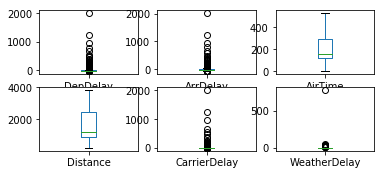

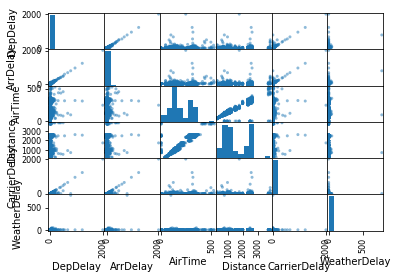

In [42]:
day_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
scatter_matrix(day_df)
plt.show()

In [43]:
master_stats_df.sort_values(by='ArrDelay', ascending=False)[:5]


,Unnamed: 0,ActualElapsedTime,AirTime,AirlineID,ArrDel15,ArrDelay,ArrDelayMinutes,ArrTime,ArrTimeBlk,ArrivalDelayGroups,...,TaxiIn,TaxiOut,TotalAddGTime,UniqueCarrier,Unnamed: 109,WeatherDelay,WheelsOff,WheelsOn,Year,Day Slot
5031942,27920,206.0,175.0,19805.0,1.0,2142.0,2142.0,115.0,1300-1359,12.0,...,13.0,18.0,0.0,AA,0.0,0.0,2007.0,102.0,2016,2.Morning
1544,1544,268.0,244.0,0.0,0.0,2023.0,2023.0,0.0,1500-1559,0.0,...,0.0,0.0,0.0,AA,0.0,0.0,0.0,0.0,2018,NaN
813600,243469,108.0,84.0,19805.0,1.0,1944.0,1944.0,16.0,1500-1559,12.0,...,8.0,16.0,276.0,AA,0.0,1934.0,2144.0,8.0,2017,3.Afternoon
700767,130636,222.0,200.0,19805.0,1.0,1935.0,1935.0,1800.0,0900-0959,12.0,...,8.0,14.0,0.0,AA,0.0,0.0,1532.0,1752.0,2017,2.Morning
3202212,210232,307.0,282.0,19805.0,1.0,1895.0,1895.0,517.0,2100-2159,12.0,...,12.0,13.0,0.0,AA,0.0,0.0,2123.0,505.0,2017,3.Afternoon


In [44]:
master_stats_df['diffelapstime']=master_stats_df['CRSElapsedTime']-master_stats_df['ActualElapsedTime']
master_stats_df.sort_values(by='diffelapstime', ascending=False)[:10]

,Unnamed: 0,ActualElapsedTime,AirTime,AirlineID,ArrDel15,ArrDelay,ArrDelayMinutes,ArrTime,ArrTimeBlk,ArrivalDelayGroups,...,TaxiOut,TotalAddGTime,UniqueCarrier,Unnamed: 109,WeatherDelay,WheelsOff,WheelsOn,Year,Day Slot,diffelapstime
78372,78372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1600-1659,0.0,...,0.0,0.0,HA,0.0,0.0,0.0,0.0,2018,NaN,690.0
656521,86390,0.0,0.0,19977.0,0.0,0.0,0.0,0.0,1400-1459,0.0,...,0.0,0.0,UA,0.0,0.0,0.0,0.0,2017,2.Morning,688.0
1211573,191425,0.0,0.0,19690.0,0.0,0.0,0.0,0.0,1600-1659,0.0,...,0.0,0.0,HA,0.0,0.0,0.0,0.0,2016,2.Morning,685.0
1212422,192274,0.0,0.0,19977.0,0.0,0.0,0.0,0.0,1500-1559,0.0,...,0.0,0.0,UA,0.0,0.0,0.0,0.0,2016,2.Morning,683.0
1209382,189234,0.0,0.0,19977.0,0.0,0.0,0.0,0.0,1500-1559,0.0,...,0.0,0.0,UA,0.0,0.0,0.0,0.0,2016,2.Morning,683.0
473851,473851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1400-1459,0.0,...,0.0,0.0,UA,0.0,0.0,0.0,0.0,2018,NaN,680.0
2953104,422754,0.0,0.0,19977.0,0.0,0.0,0.0,1458.0,1300-1359,0.0,...,18.0,0.0,UA,0.0,0.0,831.0,1453.0,2016,2.Morning,676.0
2881655,351305,0.0,0.0,19690.0,0.0,0.0,0.0,1737.0,1500-1559,0.0,...,20.0,0.0,HA,0.0,0.0,1035.0,1730.0,2016,2.Morning,675.0
2275365,213344,0.0,0.0,19690.0,0.0,0.0,0.0,604.0,1500-1559,0.0,...,24.0,0.0,HA,0.0,0.0,1020.0,550.0,2017,2.Morning,665.0
5359045,355023,0.0,0.0,19690.0,0.0,0.0,0.0,1624.0,1400-1459,0.0,...,17.0,0.0,HA,0.0,0.0,1003.0,1621.0,2016,2.Morning,655.0


In [45]:
import pandas as pd
import numpy as np
big_df=pd.read_csv('Master_Stats.csv', usecols=['Year','Month','UniqueCarrier','Origin','ArrDelay'])
big_df['delayed'] = big_df['ArrDelay'].apply(lambda x: x > 0)
#print(big_df.head())
big_nde=big_df['delayed'].value_counts()
big_dfd=big_df[['delayed','Origin','ArrDelay','Year','Month',]]
big_table = big_dfd.groupby(["Origin","delayed"]).size()\
          .unstack(fill_value=0)\
          .rename_axis(None, axis=1)\
          .reset_index()
big_table.columns = ['Origin', 'False', 'True']
per_list=list(big_table['True']/big_nde[1]  * 100)
my_big_list = big_table["Origin"].values

big_matrix = np.matrix([my_big_list,per_list])
df = pd.DataFrame(data=big_matrix)
big_dfdd=df.T
big_dfdd.columns=["Origin", "Percent"]

big_df2=pd.read_csv('airport.csv')

big_map_df=pd.merge(big_dfdd, big_df2, on="Origin")
big_map_df.to_csv('airport_loc_big.csv')


FileNotFoundError: File b'Master_Stats.csv' does not exist

In [ ]:
nd = big_df['delayed'].value_counts()[0]
print('not delayed = {}'.format(nd))
d = big_df['delayed'].value_counts()[1]
tf = nd+d
print ('Total flights = {}'.format(tf))
pot=nd/float(tf)*100
print ('Percent of on-time flights = {0:.1f}'.format(pot))

/Users/ghassan/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


NameError: name 'big_map_df' is not defined

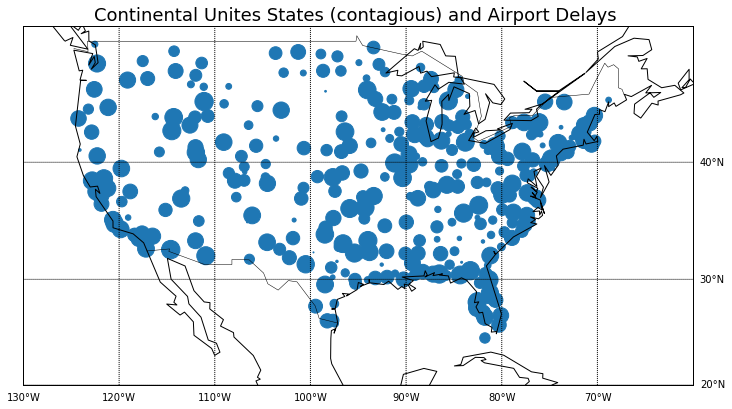

In [52]:
# Define the projection, scale, the corners of the map, and the resolution.
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import csv
plt.figure(figsize=(12,8))
m = Basemap(projection='merc',llcrnrlat=20,urcrnrlat=50,llcrnrlon=-130,urcrnrlon=-60,lat_ts=10,resolution='c')
m.drawcoastlines()
m.drawcountries()
#m.drawstates()
# draw parallels and meridians.
parallels = np.arange(20.,60.,10.)
# Label the meridians and parallels
m.drawparallels(parallels,labels=[False,True,True,False])
# Draw Meridians and Labels
meridians = np.arange(-130.,-60.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
m.drawmapboundary(fill_color='white')
plt.title("Continental Unites States (contagious) and Airport Delays ", fontsize=18)
# Color the transformed points!
lats,lons,names,percent = [],[],[],[]

with open('airport_loc_big.csv') as csvfile:
    reader = csv.DictReader(csvfile,delimiter=',')
    for data in reader:
        names.append(data['Origin'])
        lats.append(float(data['Lat']))
        lons.append(float(data['Long']))
        percent.append(float(data['Percent']))
        
x,y =m(lons,lats)
s = [n for n in range(len(percent))]

plt.scatter(x,y,s=s)
sc=plt.scatter(x,y, c=big_map_df['Percent'], vmin=0, vmax =1, cmap=cm.jet, s=s, edgecolors='none')
#plt.scatter(x,y,s=s)
#sc=plt.scatter(x,y, c=big_map_df['Percent'], vmin=0, vmax =1, cmap=cm.jet, s=s, edgecolors='none')# And let's include that colorbar
cax = plt.axes([1.0, 0.2, 0.030, 0.6])
clb=plt.colorbar(sc,cax=cax)
clb.set_label('Percent Delay', fontsize=14 )
plt.savefig("ww_temp_dist_big.png", dpi = 100)
plt.show()


In [ ]:
 df.groupby(pd.Grouper(freq='M'))

Text(0.95,0.01,'YX - Midwest Airlines')

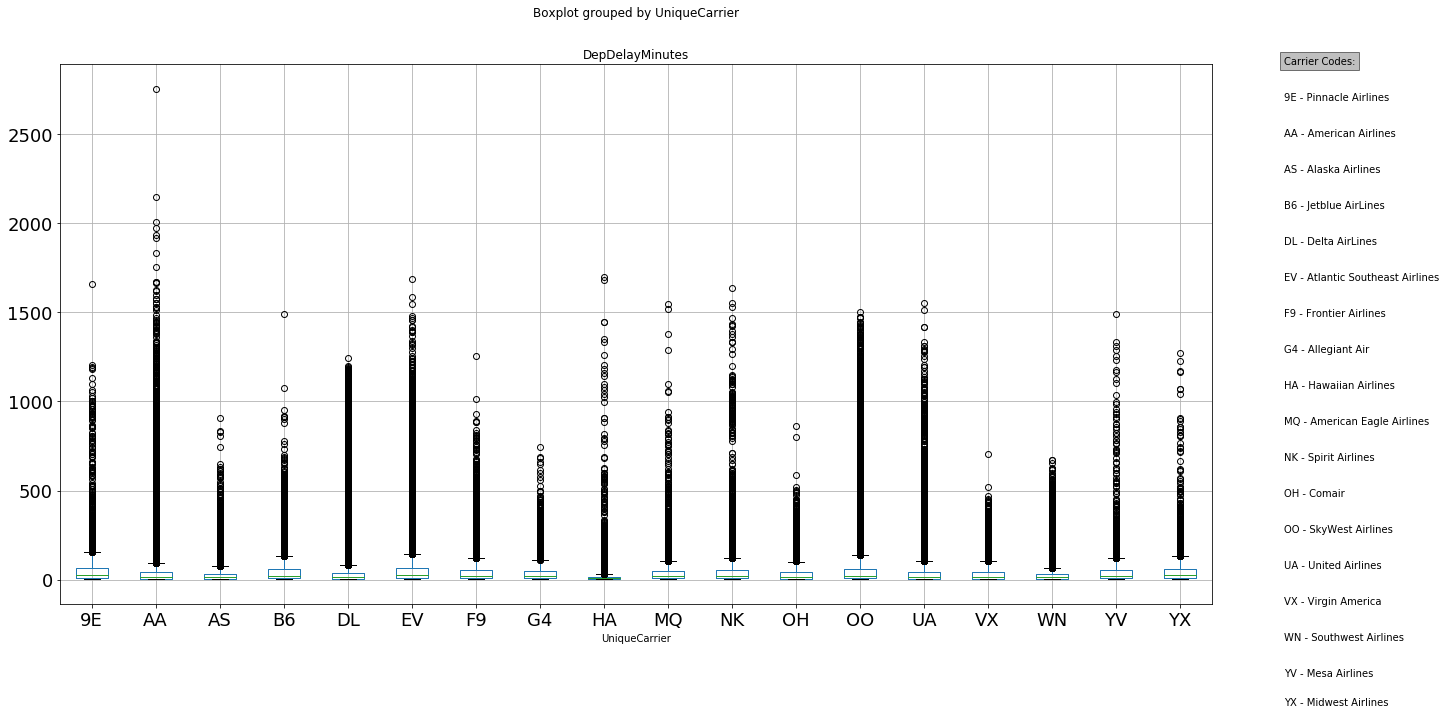

In [58]:
Delay_df.boxplot("DepDelayMinutes", by="UniqueCarrier", figsize=(20, 10), fontsize=18)


plt.figtext(0.95,0.9, "Carrier Codes:", bbox=dict(facecolor='grey', alpha=0.5) )
plt.figtext(0.95,0.85, "9E - Pinnacle Airlines")
plt.figtext(0.95,0.80, "AA - American Airlines")
plt.figtext(0.95,0.75, "AS - Alaska Airlines")
plt.figtext(0.95,0.70, "B6 - Jetblue AirLines")
plt.figtext(0.95,0.65, "DL - Delta AirLines")
plt.figtext(0.95,0.60, "EV - Atlantic Southeast Airlines")
plt.figtext(0.95,0.55, "F9 - Frontier Airlines")
plt.figtext(0.95,0.50, "G4 - Allegiant Air")
plt.figtext(0.95,0.45, "HA - Hawaiian Airlines")
plt.figtext(0.95,0.40, "MQ - American Eagle Airlines")
plt.figtext(0.95,0.35, "NK - Spirit Airlines")
plt.figtext(0.95,0.30, "OH - Comair")
plt.figtext(0.95,0.25, "OO - SkyWest Airlines")
plt.figtext(0.95,0.20, "UA - United Airlines")
plt.figtext(0.95,0.15, "VX - Virgin America")
plt.figtext(0.95,0.10, "WN - Southwest Airlines")
plt.figtext(0.95,0.05, "YV - Mesa Airlines")
plt.figtext(0.95,0.01, "YX - Midwest Airlines")

In [55]:
group1 =  Delay_df[Delay_df["UniqueCarrier"] == "AA"]["DepDelayMinutes"]
group2 =  Delay_df[Delay_df["UniqueCarrier"] == "DL"]["DepDelayMinutes"]
group3 =  Delay_df[Delay_df["UniqueCarrier"] == "F9"]["DepDelayMinutes"]
group4 =  Delay_df[Delay_df["UniqueCarrier"] == "WN"]["DepDelayMinutes"]
group5 =  Delay_df[Delay_df["UniqueCarrier"] == "UA"]["DepDelayMinutes"]


# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=3291.2544650289055, pvalue=0.0)

In [57]:
print(stats.ttest_ind(group1, group2))
print(stats.ttest_ind(group1, group3))
print(stats.ttest_ind(group1, group4))
print(stats.ttest_ind(group1, group5))
print(stats.ttest_ind(group2, group3))
print(stats.ttest_ind(group2, group4))
print(stats.ttest_ind(group2, group5))
print(stats.ttest_ind(group3, group4))
print(stats.ttest_ind(group3, group5))
print(stats.ttest_ind(group4, group5))

Ttest_indResult(statistic=-5.6061409289240061, pvalue=2.0698186990076123e-08)
Ttest_indResult(statistic=-28.287750482435886, pvalue=7.9351560901922096e-176)
Ttest_indResult(statistic=83.543080354711563, pvalue=0.0)
Ttest_indResult(statistic=-11.655953016846432, pvalue=2.1599353448039915e-31)
Ttest_indResult(statistic=-23.729000478460197, pvalue=2.3237357049325973e-124)
Ttest_indResult(statistic=87.510075372869181, pvalue=0.0)
Ttest_indResult(statistic=-5.8739957842461985, pvalue=4.2569001750529326e-09)
Ttest_indResult(statistic=88.121907071009943, pvalue=0.0)
Ttest_indResult(statistic=22.470552460813842, pvalue=1.0508332731995465e-111)
Ttest_indResult(statistic=-96.507406521920629, pvalue=0.0)
